In [1]:
import numpy as np
import pandas as pd

In [2]:
train_df = pd.read_csv('fashion-mnist_train.csv')
test_df = pd.read_csv('fashion-mnist_test.csv')

In [5]:
X_train=train_df.drop('label',axis=1).values  
Y_train=train_df['label'].values

X_test=test_df.drop('label',axis=1).values
Y_test=test_df['label'].values

In [6]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [7]:
X_train=X_train.reshape(-1,28,28,1)
X_test=X_test.reshape(-1,28,28,1)

In [9]:
import tensorflow as tf
from tensorflow.keras import layers,models

In [13]:
model=models.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.25),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),    #fully connected layer
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')  #o/p layer
])

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [15]:
history=model.fit(X_train,Y_train, epochs=5,batch_size=32,validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.7038 - loss: 0.8114 - val_accuracy: 0.8727 - val_loss: 0.3473
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 28s 19ms/step - accuracy: 0.8557 - loss: 0.3980 - val_accuracy: 0.8933 - val_loss: 0.2971
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 34s 23ms/step - accuracy: 0.8772 - loss: 0.3359 - val_accuracy: 0.9084 - val_loss: 0.2588
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 28s 19ms/step - accuracy: 0.8942 - loss: 0.2950 - val_accuracy: 0.9068 - val_loss: 0.2533
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 28s 19ms/step - accuracy: 0.9025 - loss: 0.2668 - val_accuracy: 0.9192 - val_loss: 0.2233


In [16]:
loss,metrics=model.evaluate(X_test,Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9209 - loss: 0.2131


In [19]:
print(metrics*100)

92.12999939918518


In [20]:
y_prob=model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [21]:
print(y_prob)

[[9.5463210e-01 1.8379124e-08 6.2855768e-05 ... 8.3996022e-12
  9.3172412e-07 5.7258059e-11]
 [1.3374725e-10 1.0000000e+00 2.4572344e-11 ... 4.0757826e-17
  5.9629537e-12 5.4981623e-16]
 [9.6829660e-04 3.0466907e-11 9.5498800e-01 ... 2.1360083e-10
  1.1110518e-07 1.0758983e-09]
 ...
 [1.3471933e-11 1.2185968e-16 1.3151059e-13 ... 1.6698069e-13
  1.0000000e+00 9.8787092e-16]
 [3.5580018e-05 8.6749189e-08 9.0391620e-07 ... 1.5480864e-06
  9.9986792e-01 5.9036214e-05]
 [8.4020675e-04 9.7543669e-01 1.2183195e-03 ... 9.6360045e-06
  2.5405883e-04 1.1592951e-05]]


In [23]:
#upper prob h har class ka 
#convert probability vectors into a single class label.
#argmax(axis=-1) returns the index of the highest value in each row
y_pred = y_prob.argmax(axis=-1)

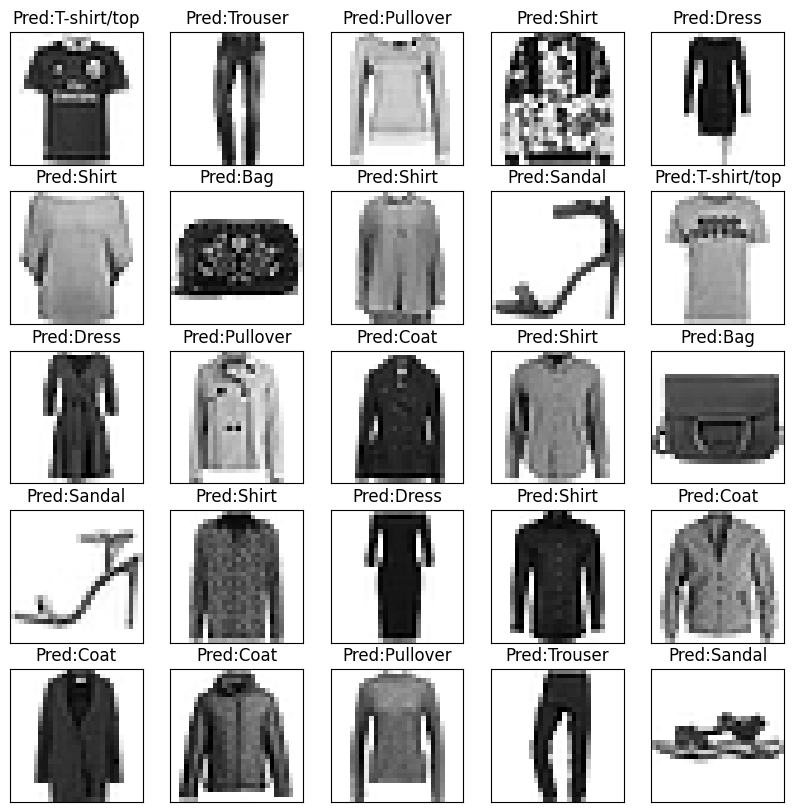

In [31]:
#visualize 25 Fashion MNIST test images
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

import matplotlib.pyplot as plt
plt.figure(figsize=(10,10),)
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])   #line hataaega axis waali
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i],plt.cm.binary)  #plt.cm.binary is a built-in colormap that shows images in black and white (grayscale). colormap
    plt.title(f"Pred:{class_names[y_pred[i]]}")
plt.show()
